<a href="https://colab.research.google.com/github/dsk40/Newbieron-Tasks/blob/main/Body_Mass_Index(BMI)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv("/content/bmi.csv")

In [91]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [93]:
# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [94]:
# Descriptive Statistics
print("Descriptive Statistics of BMI:\n", df['BMI'].describe())


Descriptive Statistics of BMI:
 count    500.000000
mean      37.765284
std       13.965620
min       12.753801
25%       27.169353
50%       36.956941
75%       46.390467
max       78.853402
Name: BMI, dtype: float64


# **Visualizations**

Text(0.5, 1.0, 'BMI Distribution')

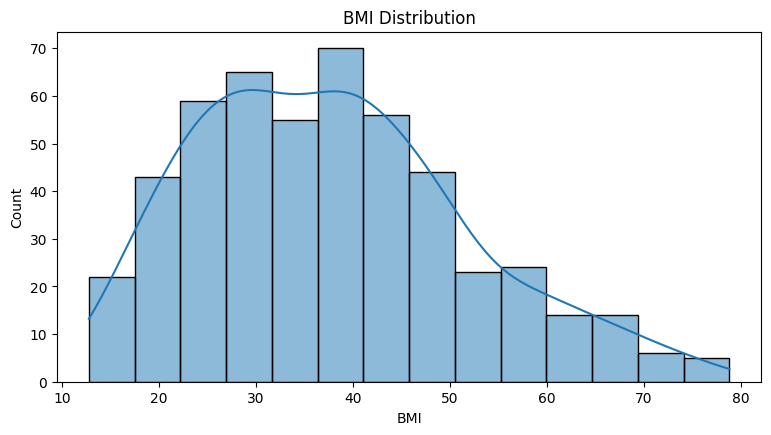

In [95]:
#BMI Distribution
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='BMI', kde=True)
plt.title("BMI Distribution")


Text(0.5, 1.0, 'BMI by Gender')

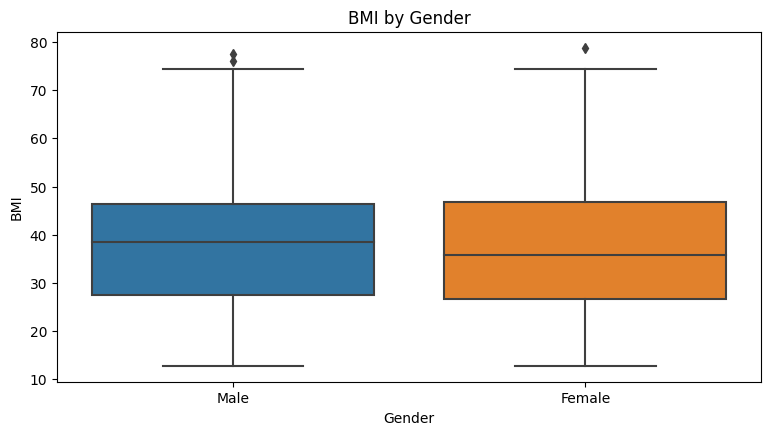

In [96]:
# BMI by Gender
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Gender', y='BMI')
plt.title("BMI by Gender")

Text(0.5, 1.0, 'BMI vs. Height')

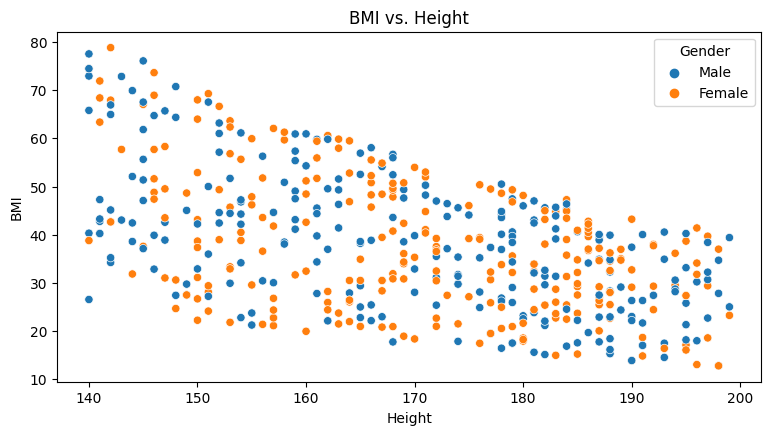

In [97]:
# BMI Vs Height
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Height', y='BMI', hue='Gender')
plt.title("BMI vs. Height")

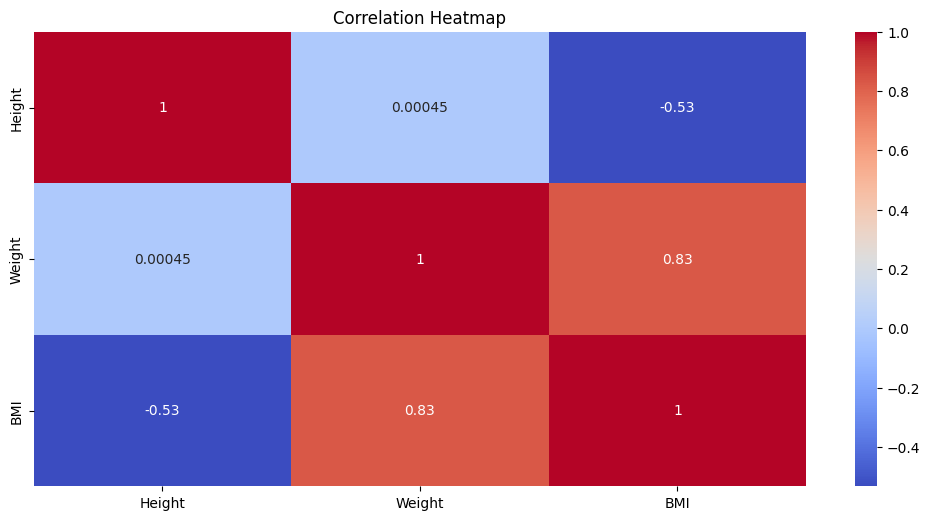

In [98]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 4)
correlation_matrix = df[['Height', 'Weight', 'BMI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# **Linear Regression**


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [100]:
df.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.708284
1,Male,189,87,2,24.355421
2,Female,185,110,4,32.140248
3,Female,195,104,3,27.350427
4,Male,149,61,3,27.476240


In [101]:
# Convert categorical variable 'Gender' to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [102]:
# Define features (X) and target (y)
X = df[['Gender_Male', 'Height', 'Weight']]
y = df['BMI']

In [103]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
# Predict BMI on the test set
y_pred = model.predict(X_test)

In [106]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.587395863734875


# **Logestic Regression**

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
df1=pd.read_csv("/content/bmi.csv")

In [109]:
df1.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [110]:
#Convert categorical variable 'Gender' to numerical using label encoding
df1['Gender'] = df1['Gender'].map({'Male': 0, 'Female': 1})

In [111]:
# Define features (X) and target (y)
X = df1[['Height', 'Weight']]
y = df1['Gender']


In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Standardize features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [115]:
# Predict gender on the test set
y_pred = model.predict(X_test_scaled)

In [116]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.54


In [117]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[25 20]
 [26 29]]


# **Random Forest**

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [119]:
df2=pd.read_csv("/content/bmi.csv")

In [120]:
# Convert categorical variable 'Gender' to numerical using one-hot encoding
df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)

In [121]:
# Define features (X) and target (y)
X = df2[['Gender_Male', 'Height', 'Weight']]
y = df2['Index']

In [122]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
# Predict BMI on the test set
y_pred = model.predict(X_test)

In [125]:
y_pred

array([4.85, 2.07, 3.52, 3.79, 4.21, 5.  , 4.99, 5.  , 3.46, 5.  , 3.79,
       5.  , 1.65, 4.69, 5.  , 2.47, 5.  , 5.  , 3.  , 5.  , 1.49, 5.  ,
       1.17, 4.  , 4.11, 5.  , 5.  , 5.  , 5.  , 1.96, 4.41, 5.  , 3.97,
       4.  , 3.75, 1.93, 5.  , 1.99, 3.43, 2.09, 4.98, 1.85, 4.02, 3.15,
       5.  , 3.76, 3.62, 3.46, 3.71, 3.65, 4.83, 4.51, 1.88, 1.05, 5.  ,
       2.82, 2.86, 5.  , 5.  , 4.06, 4.96, 5.  , 4.34, 4.58, 0.41, 2.15,
       3.48, 4.  , 1.93, 1.99, 1.87, 4.49, 2.  , 3.71, 5.  , 5.  , 5.  ,
       4.  , 2.3 , 5.  , 5.  , 3.14, 2.05, 5.  , 4.  , 5.  , 3.24, 4.97,
       4.27, 2.41, 1.1 , 1.91, 5.  , 3.61, 5.  , 1.84, 4.98, 4.68, 1.3 ,
       4.99])

In [126]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07241999999999998


# **For User Input**

In [129]:
weight = float(input("Enter weight (kg): "))
height = float(input("Enter height (cm): "))
gender = input("Enter gender (Male/Female): ")

# Convert gender input to numerical using one-hot encoding
gender_encoded = 1 if gender == 'Male' else 0

# Create feature input for prediction
input_features = [[gender_encoded, height, weight]]

# Predict BMI
predicted_bmi = model.predict(input_features)

print("Predicted BMI:", predicted_bmi[0])

Enter weight (kg): 70
Enter height (cm): 170
Enter gender (Male/Female): Male
Predicted BMI: 2.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
